In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Failed to detect a GPU.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,regularizers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import numpy as np
import splitfolders
from matplotlib import pyplot
from matplotlib.image import imread

In [4]:
folder = r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\PetImages'
split_ratio = (0.9, 0.0, 0.1)

In [5]:
splitfolders.ratio(
    folder,
    output=r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output',
    seed=500,
    ratio=split_ratio,
    group_prefix=None,
)

Copying files: 24961 files [01:42, 242.95 files/s]


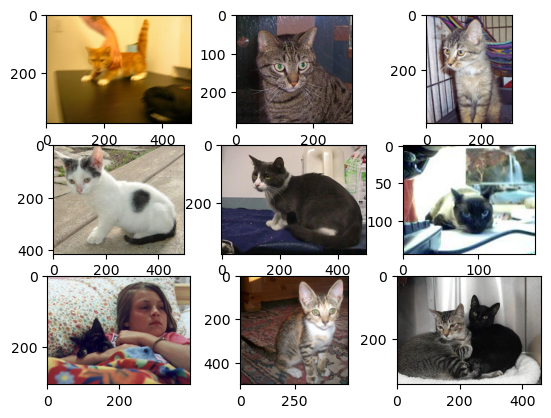

In [6]:
train_folder = r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\train\Cat/'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = train_folder + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

In [7]:
# Preprocessing Parameters

img_h = img_w = 200
batch_size = 32
# Train and Validation Generator

tvgen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',
    validation_split=0.3
)

In [8]:
# Training Dataset

train_ds = tvgen.flow_from_directory(
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\train',
    target_size=(img_h, img_w),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=300,
    subset='training'
)

# Validation Dataset

val_ds = tvgen.flow_from_directory(
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\train',
    target_size=(img_h, img_w),
    batch_size=105,
    class_mode='categorical',
    shuffle=True,
    seed=300,
    subset='validation'
)

testgen = ImageDataGenerator(
rescale=1./255
)

test_ds = testgen.flow_from_directory(
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\test',
    target_size=(img_h, img_w),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 15724 images belonging to 2 classes.
Found 6738 images belonging to 2 classes.
Found 2497 images belonging to 2 classes.


In [9]:
# Hyperparameters

w_decay = 0.001
l_rate = 0.001
#define model
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(img_h,img_w,3)))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(w_decay)))
model.add(Conv2D(64, (3, 3), activation='relu')
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(w_decay)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      73792     
                                                                 
 batch_normalization (Batch  (None, 100, 100, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 128)       0

In [10]:
model.compile(optimizer=Adam(l_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(train_ds, epochs=100, steps_per_epoch=16, validation_data=val_ds, verbose=1)

Epoch 1/100
16/16 [==============================] - 239s 16s/step - loss: 3.6778 - accuracy: 0.5156 - val_loss: 38.0775 - val_accuracy: 0.4938
Epoch 2/100
16/16 [==============================] - 261s 17s/step - loss: 1.3566 - accuracy: 0.5059 - val_loss: 0.9837 - val_accuracy: 0.5046
Epoch 3/100
16/16 [==============================] - 256s 17s/step - loss: 0.9127 - accuracy: 0.4941 - val_loss: 1.0661 - val_accuracy: 0.5194
Epoch 4/100
16/16 [==============================] - 267s 17s/step - loss: 0.8639 - accuracy: 0.5117 - val_loss: 0.9254 - val_accuracy: 0.5129
Epoch 5/100
16/16 [==============================] - 285s 19s/step - loss: 0.8657 - accuracy: 0.5117 - val_loss: 0.9714 - val_accuracy: 0.5099
Epoch 6/100
16/16 [==============================] - 242s 16s/step - loss: 0.8628 - accuracy: 0.5183 - val_loss: 1.0260 - val_accuracy: 0.5073
Epoch 7/100
16/16 [==============================] - 256s 17s/step - loss: 0.8556 - accuracy: 0.5352 - val_loss: 1.1002 - val_accuracy: 0.484

C:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


16/16 [==============================] - 258s 17s/step - loss: 0.8553 - accuracy: 0.4980 - val_loss: 1.0859 - val_accuracy: 0.4865
Epoch 9/100
16/16 [==============================] - 237s 15s/step - loss: 0.8544 - accuracy: 0.4766 - val_loss: 0.9741 - val_accuracy: 0.4902
Epoch 10/100
16/16 [==============================] - 233s 15s/step - loss: 0.8522 - accuracy: 0.4941 - val_loss: 0.9083 - val_accuracy: 0.4991
Epoch 11/100
16/16 [==============================] - 232s 15s/step - loss: 0.8502 - accuracy: 0.5000 - val_loss: 0.8732 - val_accuracy: 0.5031
Epoch 12/100
16/16 [==============================] - 235s 15s/step - loss: 0.8491 - accuracy: 0.4785 - val_loss: 0.8585 - val_accuracy: 0.5034
Epoch 13/100
16/16 [==============================] - 234s 15s/step - loss: 0.8470 - accuracy: 0.5078 - val_loss: 0.8507 - val_accuracy: 0.5036
Epoch 14/100
16/16 [==============================] - 233s 15s/step - loss: 0.8456 - accuracy: 0.5098 - val_loss: 0.8468 - val_accuracy: 0.5024
Epoch 

Epoch 65/100
16/16 [==============================] - 256s 17s/step - loss: 0.7854 - accuracy: 0.5234 - val_loss: 0.7855 - val_accuracy: 0.4996
Epoch 66/100
16/16 [==============================] - 250s 16s/step - loss: 0.7853 - accuracy: 0.4883 - val_loss: 0.7844 - val_accuracy: 0.4996
Epoch 67/100
16/16 [==============================] - 257s 17s/step - loss: 0.7847 - accuracy: 0.4668 - val_loss: 0.7834 - val_accuracy: 0.4996
Epoch 68/100
16/16 [==============================] - 251s 16s/step - loss: 0.7831 - accuracy: 0.4805 - val_loss: 0.7823 - val_accuracy: 0.5000
Epoch 69/100
16/16 [==============================] - 251s 17s/step - loss: 0.7818 - accuracy: 0.5059 - val_loss: 0.7813 - val_accuracy: 0.5000
Epoch 70/100
16/16 [==============================] - 252s 17s/step - loss: 0.7808 - accuracy: 0.4980 - val_loss: 0.7803 - val_accuracy: 0.5000
Epoch 71/100
16/16 [==============================] - 251s 16s/step - loss: 0.7798 - accuracy: 0.5020 - val_loss: 0.7792 - val_accuracy:

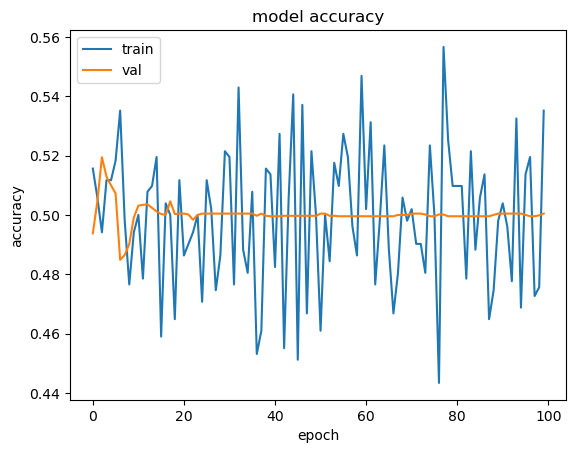

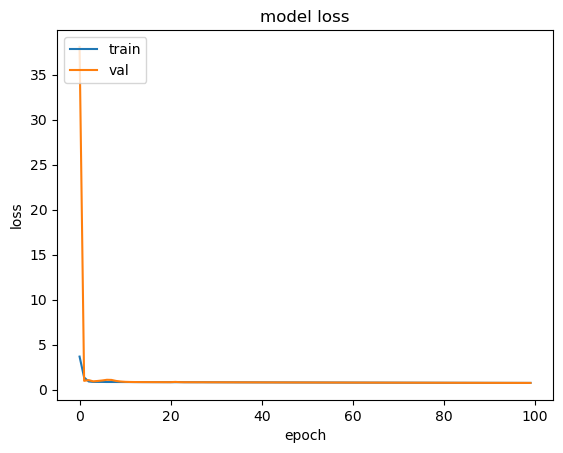

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [13]:
test_eval = model.evaluate(test_ds)

print(f"Loss on Test Dataset is {test_eval[0]:.2f} and Test Dataset Accuracy is {test_eval[1]:.2f}.")

79/79 [==============================] - 91s 1s/step - loss: 0.7526 - accuracy: 0.5006
Loss on Test Dataset is 0.75 and Test Dataset Accuracy is 0.50.


In [14]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import numpy as np
predict_list = [
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\test\Cat\8732.jpg',
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\test\Dog\356.jpg'
    ]
train_ds.class_indices

classes = ['Cat','Dog']

def predictshow(x=0):
    path = predict_list[x]
    img = load_img(path, target_size=(img_h,img_w,3))
    X = img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    print(val)
    img = Image.open(path)  
    plt.imshow(img)
    plt.title(label=str(classes[np.argmax(val)]))
    plt.show

1/1 [==============================] - 1s 1s/step
[[0.5038665  0.49613354]]
1/1 [==============================] - 0s 164ms/step
[[0.5038665  0.49613354]]


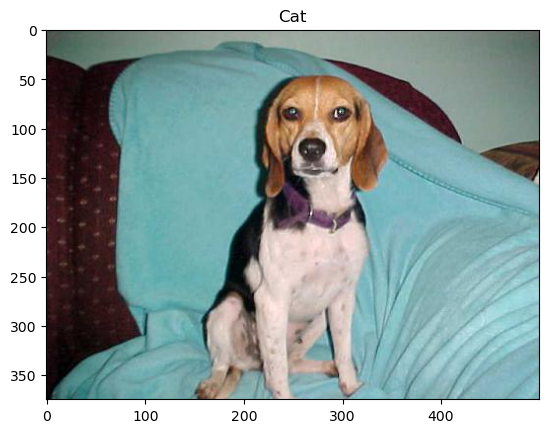

In [15]:
predictshow(0)
predictshow(1)